Install pyradiomics

In [2]:
pip install pyradiomics

     |████████████████████████████████| 188 kB 5.4 MB/s 
     |████████████████████████████████| 48.4 MB 1.6 MB/s 
     |████████████████████████████████| 109 kB 48.3 MB/s 
     |████████████████████████████████| 546 kB 43.1 MB/s 


In [3]:
# special functions for using pyradiomics
from SimpleITK import GetImageFromArray
import radiomics
from radiomics.featureextractor import RadiomicsFeatureExtractor # This module is used for interaction with pyradiomic
import logging
logging.getLogger('radiomics').setLevel(logging.CRITICAL + 1)  # this tool makes a whole TON of log noise

import numpy as np # for manipulating 3d images
import pandas as pd # for reading and writing tables
import h5py # for reading the image files
import skimage # for image processing and visualizations
import sklearn # for machine learning and statistical models
import os # help us load files and deal with paths
from pathlib import Path # help manage files

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

Setting up for pyradiomics

In [5]:
# Instantiate the extractor
texture_extractor = RadiomicsFeatureExtractor(verbose=False)
texture_extractor.disableAllFeatures()
_text_feat = {ckey: [] for ckey in texture_extractor.featureClassNames}
texture_extractor.enableFeaturesByName(**_text_feat)

print('Extraction parameters:\n\t', texture_extractor.settings)
print('Enabled filters:\n\t', texture_extractor.enabledImagetypes) 
print('Enabled features:\n\t', texture_extractor.enabledFeatures) 

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'verbose': False}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': [], 'shape2D': []}


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Contains MRI data in nifti (see nibabel) and hdf5 formats
 - Glimpse of file structure using directory-structure

In [8]:
pip install directory-structure

     |████████████████████████████████| 170 kB 6.7 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=1ee07355c068c9a6988730a9345048ca2aa73001bfb5c1049a899a6d1ee79a70
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [9]:
from directory_structure import Tree

In [10]:
path = Tree('/content/drive/MyDrive/trabit2019-imaging-biomarkers',absolute=False)
print(path)

📂 trabit2019-imaging-biomarkers
|_📁 test
|_📁 train
|_📄 test_sample_submission.csv
|_📄 train.csv


Load the train data

In [11]:
path = Tree('/content/drive/MyDrive/trabit2019-imaging-biomarkers/train',absolute=False)
print(path)

📂 train
|_📄 mri_00927711.nii
|_📄 mri_00436960.nii
|_📄 mri_00955450.nii
|_📄 mri_00051473.nii
|_📄 mri_00964741.nii
|_📄 mri_00963940.nii
|_📄 mri_00099096.nii
|_📄 mri_00818904.nii
|_📄 mri_00695368.nii
|_📄 mri_00775099.nii
|_📄 mri_00714482.nii
|_📄 mri_00768258.nii
|_📄 mri_00998530.nii
|_📄 mri_00214032.nii
|_📄 mri_00069265.nii
|_📄 mri_00855385.nii
|_📄 mri_00893391.nii
|_📄 mri_00420210.nii
|_📄 mri_00679456.nii
|_📄 mri_00301927.nii
|_📄 mri_00176703.nii
|_📄 mri_00453910.nii
|_📄 mri_00652893.nii
|_📄 mri_00744717.nii
|_📄 mri_00014004.nii
|_📄 mri_00156141.nii
|_📄 mri_00496219.nii
|_📄 mri_00412494.nii
|_📄 mri_00308293.nii
|_📄 mri_00267322.nii
|_📄 mri_00271234.nii
|_📄 mri_00291918.nii
|_📄 mri_00945813.nii
|_📄 mri_00334309.nii
|_📄 mri_00864372.nii
|_📄 mri_00629033.nii
|_📄 mri_00301002.nii
|_📄 mri_00491550.nii
|_📄 mri_00697188.nii
|_📄 mri_00249592.nii
|_📄 mri_00287774.nii
|_📄 mri_00922826.nii
|_📄 mri_00809737.nii
|_📄 mri_00004519.nii
|_📄 mri_00758451.nii
|_📄 mri_00538739.nii
|_📄 mri_00892379.nii
|_📄 m

In [7]:
train_df = pd.read_csv('/content/drive/MyDrive/trabit2019-imaging-biomarkers/train.csv')
train_df.head(5) # show the first 5 lines

,scan_id,age_years,ni_path,h5_path
0,4519,89,mri_00004519.nii,mri_00004519.h5
1,14004,21,mri_00014004.nii,mri_00014004.h5
2,31532,23,mri_00031532.nii,mri_00031532.h5
3,51473,90,mri_00051473.nii,mri_00051473.h5
4,60925,18,mri_00060925.nii,mri_00060925.h5


Construct a function to read image data matching with h5_path from csv file

In [12]:
def read_scan(in_filename, folder='train'):
    full_scan_path = os.path.join('/content/drive/MyDrive/trabit2019-imaging-biomarkers/',folder, in_filename)
    # load the image using hdf5
    with h5py.File(full_scan_path, 'r') as h:
        return h['image'][:][:, :, :, 0] # read the data from the file

In [13]:
sample_scan = train_df.iloc[0] # just take the first row

In [14]:
sample_scan

scan_id                  4519
age_years                  89
ni_path      mri_00004519.nii
h5_path       mri_00004519.h5
Name: 0, dtype: object

In [15]:
###using regular expression handling file
data_root = Path('/content/drive/MyDrive/trabit2019-imaging-biomarkers')
all_df = pd.DataFrame({'h5_path': list(data_root.glob('*/*.h5'))})
all_df['file_id'] = all_df['h5_path'].map(lambda x: x.stem)
all_df['training_group'] = all_df['h5_path'].map(lambda x: x.parent.stem)
all_df['scan_id'] = all_df['file_id'].map(lambda x: int(x.split('_')[-1]))
all_df.head(5) # show the first 5 lines

,h5_path,file_id,training_group,scan_id
0,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00041615,test,41615
1,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00000273,test,273
2,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00087269,test,87269
3,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00062974,test,62974
4,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00099700,test,99700


Read image section

In [16]:
sample_scan = train_df.iloc[0] # take the first row
print(sample_scan)

scan_id                  4519
age_years                  89
ni_path      mri_00004519.nii
h5_path       mri_00004519.h5
Name: 0, dtype: object


In [17]:
# turn the h5_path into the full path
image_data = read_scan(sample_scan['h5_path']) # just select h5_path part, using function above
print('Image Shape:', image_data.shape)

Image Shape: (176, 208, 176)


Calculate radiomics features

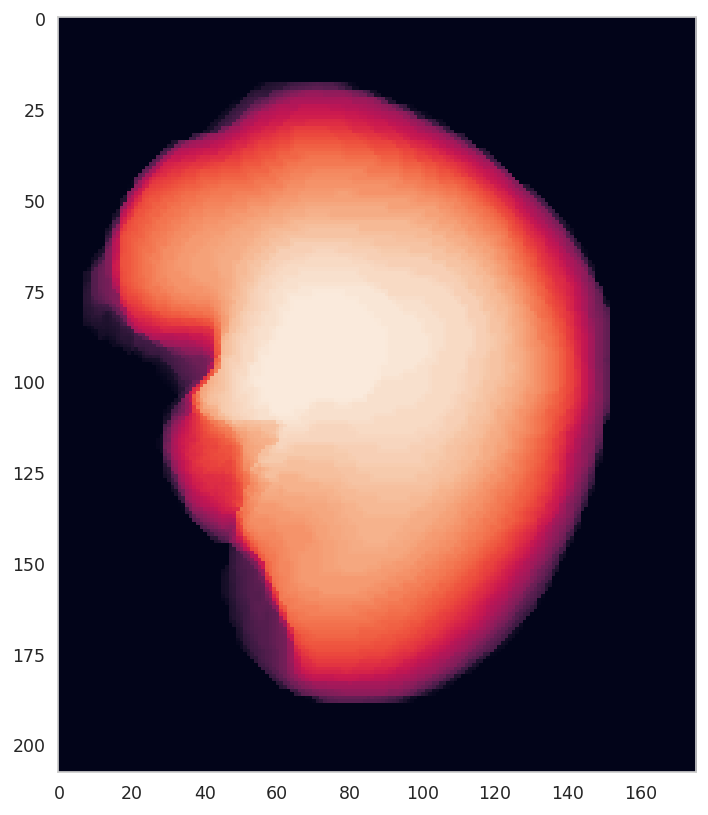

In [18]:
# Keeping the part of the image greater than 0
plt.imshow(np.sum((image_data>0).astype(float), 0))

In [19]:
%%time
results = texture_extractor.execute(GetImageFromArray(image_data),
                            GetImageFromArray((image_data>0).astype(np.uint8)))

CPU times: user 30.8 s, sys: 581 ms, total: 31.4 s
Wall time: 30.7 s


In [20]:
pd.DataFrame([results]).T ## example of sample result for texture features

,0
diagnostics_Versions_PyRadiomics,v3.0.1
diagnostics_Versions_Numpy,1.19.5
diagnostics_Versions_SimpleITK,2.1.1
diagnostics_Versions_PyWavelet,1.2.0
diagnostics_Versions_Python,3.7.12
...,...
original_ngtdm_Busyness,12.224553036861083
original_ngtdm_Coarseness,1.3527583549140199e-05
original_ngtdm_Complexity,25751.363639758587
original_ngtdm_Contrast,0.07909212495470912


In [21]:
def calc_radiomics(in_image_data):
    return texture_extractor.execute(GetImageFromArray(in_image_data),
                            GetImageFromArray((in_image_data>0).astype(np.uint8)))

###### Apply all image files to calculate radiomics texture

In [22]:
%%time
all_df['radiomics'] = all_df['h5_path'].map(lambda c_filename: calc_radiomics(read_scan(c_filename)))

CPU times: user 52min 39s, sys: 46.9 s, total: 53min 26s
Wall time: 52min 40s


In [23]:
full_df = pd.DataFrame([dict(**c_row.pop('radiomics'), **c_row) for _, c_row in all_df.iterrows()])
print(full_df.shape, 'data prepared')
first_cols = all_df.columns[:-1].tolist()
full_df = full_df[first_cols + [c_col for c_col in full_df.columns 
                                if c_col not in first_cols]]
# export the whole table
full_df.to_csv('all_radiomics_table.csv', index=False)

(100, 133) data prepared


In [24]:
full_df.sample(3) ## select 3 data

,h5_path,file_id,training_group,scan_id,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,...,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
34,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00051473,train,51473,v3.0.1,1.19.5,2.1.1,1.2.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},486fc5c02bcd9f6e24d9c6838fa3154180a6fda3,3D,"(1.0, 1.0, 1.0)","(176, 208, 176)",230.876213,0.0,3191.0,5994321ce1a7a40b1b8bd91e04c1bfec16e8d8da,"(1.0, 1.0, 1.0)","(176, 208, 176)","(7, 18, 18, 145, 171, 137)",1667264,1,"(83.81065146251584, 98.03310273597943, 86.6700...","(83.81065146251584, 98.03310273597943, 86.6700...",0.80947,0.744065,117.773456,158.283893,146.98639392814562,174.7483905505284,175.6160584912439,177.65415840897168,1667102.4583333333,128.12608,0.8131198043832792,83618.89937166467,0.05015822450124734,1667264.0,...,0.29199532160686464,331.98190741419177,0.0008787641009725196,27867.129806558314,0.018337707810672937,233.43418039201617,1267.3846070627244,1.3274253984839013,1726.1266488193469,0.006716830588293573,0.004147118531698791,6.279953101516449,1286042.1086210476,0.8458489354264179,0.9114897682209158,0.12269021975406434,0.935807857474185,1177.096884833201,0.0037079538507558507,11490.639650563662,0.020795768777250916,171.78156084010172,1107.9395236966268,1575.6440483795948,3220255.1598560847,16.816948288190567,0.0029222392869031376,209616.08085285051,0.3793633498197448,

Select features (remove features)

In [25]:
# leave out anything that doesn't start with original (just junk from the input)
# also remove shape since it is not very informative
value_feature_names = [c_col for c_col in full_df.columns if (c_col.startswith('original') and '_shape_' not in c_col)]
print(np.random.choice(value_feature_names, 3), 'of', len(value_feature_names))

['original_firstorder_Variance'
 'original_glrlm_LongRunHighGrayLevelEmphasis'
 'original_glcm_JointEntropy'] of 93


In [26]:
# make a cleaner vefirst_colson
clean_df = full_df[first_cols + value_feature_names].copy()
clean_df.columns = first_cols + [
    ' '.join(c_col.split('original_')[-1].split('_')) 
    for c_col in value_feature_names
]
clean_col_names = clean_df.columns[len(first_cols):]
# fix some of the artifacts from the radiomics tool
obj_cols = clean_df[clean_col_names].select_dtypes(['object']).columns.tolist()
for c_col in obj_cols:
    clean_df[c_col] = clean_df[c_col].map(lambda x: float(x))
clean_df.to_csv('clean_radiomics_table.csv', index=False)
clean_df.sample(3)

,h5_path,file_id,training_group,scan_id,firstorder 10Percentile,firstorder 90Percentile,firstorder Energy,firstorder Entropy,firstorder InterquartileRange,firstorder Kurtosis,firstorder Maximum,firstorder MeanAbsoluteDeviation,firstorder Mean,firstorder Median,firstorder Minimum,firstorder Range,firstorder RobustMeanAbsoluteDeviation,firstorder RootMeanSquared,firstorder Skewness,firstorder TotalEnergy,firstorder Uniformity,firstorder Variance,glcm Autocorrelation,glcm ClusterProminence,glcm ClusterShade,glcm ClusterTendency,glcm Contrast,glcm Correlation,glcm DifferenceAverage,glcm DifferenceEntropy,glcm DifferenceVariance,glcm Id,glcm Idm,glcm Idmn,glcm Idn,glcm Imc1,glcm Imc2,glcm InverseVariance,glcm JointAverage,glcm JointEnergy,...,gldm SmallDependenceEmphasis,gldm SmallDependenceHighGrayLevelEmphasis,gldm SmallDependenceLowGrayLevelEmphasis,glrlm GrayLevelNonUniformity,glrlm GrayLevelNonUniformityNormalized,glrlm GrayLevelVariance,glrlm HighGrayLevelRunEmphasis,glrlm LongRunEmphasis,glrlm LongRunHighGrayLevelEmphasis,glrlm LongRunLowGrayLevelEmphasis,glrlm LowGrayLevelRunEmphasis,glrlm RunEntropy,glrlm RunLengthNonUniformity,glrlm RunLengthNonUniformityNormalized,glrlm RunPercentage,glrlm RunVariance,glrlm ShortRunEmphasis,glrlm ShortRunHighGrayLevelEmphasis,glrlm ShortRunLowGrayLevelEmphasis,glszm GrayLevelNonUniformity,glszm GrayLevelNonUniformityNormalized,glszm GrayLevelVariance,glszm HighGrayLevelZoneEmphasis,glszm LargeAreaEmphasis,glszm LargeAreaHighGrayLevelEmphasis,glszm LargeAreaLowGrayLevelEmphasis,glszm LowGrayLevelZoneEmphasis,glszm SizeZoneNonUniformity,glszm SizeZoneNonUniformityNormalized,glszm SmallAreaEmphasis,glszm SmallAreaHighGrayLevelEmphasis,glszm SmallAreaLowGrayLevelEmphasis,glszm ZoneEntropy,glszm ZonePercentage,glszm ZoneVariance,ngtdm Busyness,ngtdm Coarseness,ngtdm Complexity,ngtdm Contrast,ngtdm Strength
48,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00214032,train,214032,501.0,1373.0,1.528015e+12,5.572265,492.0,2.215627,2810.0,268.740859,901.871703,849.0,84.0,2726.0,203.615477,957.329957,0.063866,1.528015e+12,0.023585,103108.077033,1291.143812,848738.295023,1242.495703,620.461379,32.366653,0.900783,4.084261,3.559313,15.259024,0.341599,0.257398,0.997364,0.965297,-0.228445,0.955896,0.257301,33.824815,0.001666,...,0.243679,275.477925,0.000525,35101.843500,0.023511,159.755849,1260.461595,1.399992,1907.526634,0.002950,0.002129,6.094806,1.226223e+06,0.820816,0.895462,0.151342,0.924153,1144.302628,0.001970,10723.676366,0.023736,131.049410,1097.986053,11581.040109,3.275744e+07,4.511886,0.002209,157498.768790,0.348605,0.611416,682.345686,0.001330,7.860185,0.270981,11567.421835,14.576751,0.000014,12627.181537,0.056060,0.106103
68,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00496219,train,496219,518.0,1340.0,1.531000e+12,5.516476,497.0,2.438951,3286.0,262.110740,906.483445,858.0,78.0,3208.0,201.957095,958.264500,0.047240,1.531000e+12,0.024685,96558.615715,1291.802402,768673.357048,807.025502,571.720204,35.304934,0.883574,4.195510,3.598875,17.287486,0.338943,0.254871,0.997911,0.969408,-0.215017,0.947645,0.255125,34.024935,0.001768,...,0.249611,283.983318,0.000543,36588.174342,0.024471,150.844981,1262.707189,1.392547,1898.832355,0.002655,0.001990,6.039372,1.230060e+06,0.822269,0.896755,0.147744,0.924884,1147.395824,0.001857,11142.115397,0.024081,132.874804,1099.784763,11887.134476,3.101923e+07,4.812776,0.002250,165294.011288,0.357245,0.619538,698.955842,0.001394,7.816375,0.277515,11874.149934,12.502688,0.000012,21484.601287,0.040097,0.181803
32,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00031532,train,31532,519.0,1383.0,1.563848e+12,5.565803,511.0,2.319562,3497.0,273.182805,912.414934,854.0,28.0,3469.0,209.314803,968.489751,0.085112,1.563848e+12,0.023974,105471.384861,1465.447971,879554.306364,1487.053098,626.501027,34.758489,0.894751,4.159141,3.587137,17.028766,0.341191,0.257424,0.998226,0.971726,-0.224816,0.953815,0.256597,36.297509,0.001744,...,0.247426,325.981974,0.00

radiomics csv vesrion 

In [27]:
clean = pd.read_csv('clean_radiomics_table.csv')
clean.head(5) # show the first 5 lines

,h5_path,file_id,training_group,scan_id,firstorder 10Percentile,firstorder 90Percentile,firstorder Energy,firstorder Entropy,firstorder InterquartileRange,firstorder Kurtosis,firstorder Maximum,firstorder MeanAbsoluteDeviation,firstorder Mean,firstorder Median,firstorder Minimum,firstorder Range,firstorder RobustMeanAbsoluteDeviation,firstorder RootMeanSquared,firstorder Skewness,firstorder TotalEnergy,firstorder Uniformity,firstorder Variance,glcm Autocorrelation,glcm ClusterProminence,glcm ClusterShade,glcm ClusterTendency,glcm Contrast,glcm Correlation,glcm DifferenceAverage,glcm DifferenceEntropy,glcm DifferenceVariance,glcm Id,glcm Idm,glcm Idmn,glcm Idn,glcm Imc1,glcm Imc2,glcm InverseVariance,glcm JointAverage,glcm JointEnergy,...,gldm SmallDependenceEmphasis,gldm SmallDependenceHighGrayLevelEmphasis,gldm SmallDependenceLowGrayLevelEmphasis,glrlm GrayLevelNonUniformity,glrlm GrayLevelNonUniformityNormalized,glrlm GrayLevelVariance,glrlm HighGrayLevelRunEmphasis,glrlm LongRunEmphasis,glrlm LongRunHighGrayLevelEmphasis,glrlm LongRunLowGrayLevelEmphasis,glrlm LowGrayLevelRunEmphasis,glrlm RunEntropy,glrlm RunLengthNonUniformity,glrlm RunLengthNonUniformityNormalized,glrlm RunPercentage,glrlm RunVariance,glrlm ShortRunEmphasis,glrlm ShortRunHighGrayLevelEmphasis,glrlm ShortRunLowGrayLevelEmphasis,glszm GrayLevelNonUniformity,glszm GrayLevelNonUniformityNormalized,glszm GrayLevelVariance,glszm HighGrayLevelZoneEmphasis,glszm LargeAreaEmphasis,glszm LargeAreaHighGrayLevelEmphasis,glszm LargeAreaLowGrayLevelEmphasis,glszm LowGrayLevelZoneEmphasis,glszm SizeZoneNonUniformity,glszm SizeZoneNonUniformityNormalized,glszm SmallAreaEmphasis,glszm SmallAreaHighGrayLevelEmphasis,glszm SmallAreaLowGrayLevelEmphasis,glszm ZoneEntropy,glszm ZonePercentage,glszm ZoneVariance,ngtdm Busyness,ngtdm Coarseness,ngtdm Complexity,ngtdm Contrast,ngtdm Strength
0,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00041615,test,41615,513.0,1350.0,1.571024e+12,5.522757,501.0,2.327547,3147.0,265.427213,918.267830,880.0,118.0,3029.0,204.269986,970.709365,-0.065663,1.571024e+12,0.024222,99060.863070,1263.567611,8.118706e+05,-963.832449,594.794106,28.879173,0.907303,3.881508,3.483291,13.436013,0.345400,0.260003,0.998083,0.969966,-0.234433,0.957879,0.261834,33.497559,0.001797,...,0.233205,261.527896,0.000515,35863.213853,0.024009,154.612302,1238.127443,1.393132,1834.165051,0.003163,0.002241,6.051198,1.224805e+06,0.819446,0.895932,0.145862,0.923604,1126.923718,0.002062,10477.163159,0.024387,127.769914,1085.735586,17672.443150,4.545031e+07,7.841800,0.002238,143877.421745,0.334888,0.598678,662.937996,0.001332,7.909462,0.257685,17657.383268,11.904730,0.000014,15960.956724,0.040539,0.168494
1,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00000273,test,273,538.0,1321.0,1.556741e+12,5.420472,514.0,2.128102,2692.0,260.552972,917.509900,883.0,82.0,2610.0,206.547828,966.286785,-0.145864,1.556741e+12,0.026502,91885.735109,1319.339975,6.408963e+05,-1717.955024,550.588845,26.914517,0.906695,3.650664,3.424388,13.237634,0.374020,0.295451,0.997593,0.967451,-0.246602,0.961136,0.284423,34.473453,0.002554,...,0.216890,237.073773,0.000465,37414.882785,0.025777,140.799009,1262.741763,1.539468,2206.799509,0.003588,0.002199,6.037477,1.146780e+06,0.789452,0.870547,0.217662,0.908764,1114.987449,0.001974,10397.573898,0.026159,110.401229,1058.744099,39376.482331,9.876725e+07,17.391519,0.002207,136454.812010,0.343302,0.606337,654.620274,0.001313,7.756847,0.238401,39358.887603,15.255199,0.000014,8720.357149,0.055243,0.079687
2,/content/drive/MyDrive/trabit2019-imaging-biom...,mri_00087269,test,87269,528.0,1320.0,1.540402e+12,5.455430,492.0,2.166214,2846.0,255.158090,913.055103,881.0,118.0,2728.0,198.098870,961.202347,-0.123110,1.540402e+12,0.025316,90240.330093,1234.320836,6.350207e+05,-1466.669434,543.225038,27.369609,0.903995,3.753131,3.443491,12.918087,0.355366,0.271795,0.997768,0.967946,-0.234840,0.956554,0.271544,33.246884,0.001999,...,0.223667,242.181738,0.000480,37

In [28]:
clean.columns

Index(['h5_path', 'file_id', 'training_group', 'scan_id',
       'firstorder 10Percentile', 'firstorder 90Percentile',
       'firstorder Energy', 'firstorder Entropy',
       'firstorder InterquartileRange', 'firstorder Kurtosis',
       'firstorder Maximum', 'firstorder MeanAbsoluteDeviation',
       'firstorder Mean', 'firstorder Median', 'firstorder Minimum',
       'firstorder Range', 'firstorder RobustMeanAbsoluteDeviation',
       'firstorder RootMeanSquared', 'firstorder Skewness',
       'firstorder TotalEnergy', 'firstorder Uniformity',
       'firstorder Variance', 'glcm Autocorrelation', 'glcm ClusterProminence',
       'glcm ClusterShade', 'glcm ClusterTendency', 'glcm Contrast',
       'glcm Correlation', 'glcm DifferenceAverage', 'glcm DifferenceEntropy',
       'glcm DifferenceVariance', 'glcm Id', 'glcm Idm', 'glcm Idmn',
       'glcm Idn', 'glcm Imc1', 'glcm Imc2', 'glcm InverseVariance',
       'glcm JointAverage', 'glcm JointEnergy', 'glcm JointEntropy',
       'glc